In [12]:
import numpy as np
import numba as nb
from numba import njit
import matplotlib.pyplot as plt


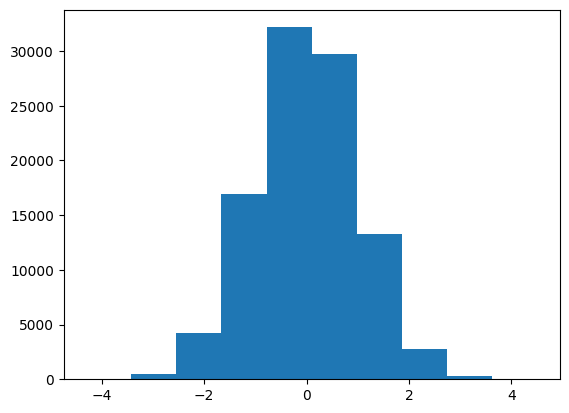

In [52]:
from numpy import pi, sqrt, log, sin, cos, exp
from numpy.random import rand

K = 100_000
n_tau = 40
d_tau = 1

# box_miller
R = rand(K)
S = rand(K)
P = sqrt(-2 * log(R)) * sin(2 * pi * S)
Q = sqrt(-2 * log(R)) * cos(2 * pi * S)

@njit
def action(x):
    return 0.5 * x**2

@njit
def hamil(x, p):
    return action(x) + 0.5 * p**2

@njit
def del_h(x):
    return x

@njit
def MD(k, x):
    p = P[k]
    init = hamil(x, p)

    x = x + p * 0.5 * d_tau

    for _ in range(n_tau):
        _del_h = del_h(x)
        p = p - _del_h * d_tau
        x = x + p* d_tau
    

    _del_h = del_h(x)
    p = p - _del_h * d_tau
    x = x + p* d_tau

    fin = hamil(x, p)
    return x, init, fin


@njit
def main():
    X = np.full(K, np.nan)
    Accept = np.full(K, False)
    Sum_xx = np.full(K, np.nan)
    Metro = rand(K)

    X[0] = 0
    Sum_xx[0] = 0

    for k in range(1, K):
        X[k], init, fin = MD(k, X[k-1])
        Accept[k] = exp(init - fin) > Metro[k]
        X[k] = X[k] if Accept[k] else X[k-1]
        Sum_xx[k] = X[k]**2

    return X, Accept, Sum_xx

X, Accept, Sum_xx = main()

Accept.sum()/ K

plt.hist(Q);

0.13081301666112666 0.0171120453279842 1.0
-1.1661091644144779 0.986027430818759 0.9991400171996561
2.2742812919351474 0.9941873819210021 0.999170008299917
2.4580935026826425 0.9956801715071837 0.9992866714221905
-0.3197093728116911 1.0003101573138848 0.9993100034499828
1.7822233903886564 1.0005368262479877 0.9993400026399895
-0.1451836266346705 0.9976588121018112 0.9993300022333259
-0.7282603226708634 0.9984444533366534 0.9993342876163211
0.49218733144060944 0.9989514569846596 0.9993300016749959
0.9424324711752967 0.9989846973562734 0.9993177792938238


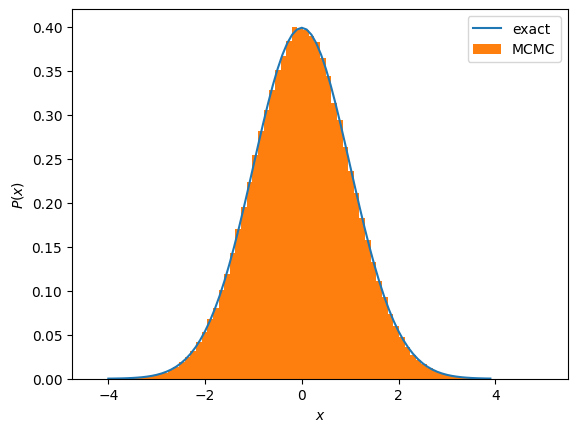

In [10]:
import numpy as np
from matplotlib import pyplot as plt
# seed of random numbers is the system time by default
# Numpy has Gaussian random number generator, so we don't use Box-Muller

NITER = 500000
NTAU = 10
DTAU = 0.1
##################################
### Calculation of the action  ###
##################################
#When you change the action, you should also change dH/dx, specified in "calc_delh".
def calc_action(x):
    return 0.5*x*x
######################################
### Calculation of the Hamiltonian ###
######################################
def calc_hamiltonian(x,p):
    ham = calc_action(x)
    ham += 0.5*p*p
    return ham
#############################
### Calculation of dH/dx  ###
#############################
def calc_delh(x):
    delh = x
    return delh
#############################
### Molecular evolution  ###
#############################
def Molecular_Dynamics(x):
    # Momentum p is chosen to be Gaussian ##
    p = np.random.randn()
    # calculate Hamiltonian ##
    ham_init = calc_hamiltonian(x,p)
    # first step of leap frog ##
    x += p*0.5*DTAU
    # 2nd, ..., Ntau-th steps ##
    for step in range(1,NTAU):
        delh = calc_delh(x)
        p += -delh*DTAU
        x += p*DTAU
        
    # last step of leap frog ##
    delh = calc_delh(x)
    p += -delh*DTAU
    x += p*0.5e0*DTAU

    # calculate Hamiltonian again ##
    ham_fin=calc_hamiltonian(x,p)
    return x,ham_init,ham_fin
#####################################
### Set the initial configuration ###
#####################################
x = 0
naccept = 0
sum_xx = 0.0 #sum of x^2, useed for <x^2>

# data for plot
data_for_plot = []

#################
### Main Loop ###
#################
for iter in range(NITER):
    backup_x=x
    x,ham_init,ham_fin = Molecular_Dynamics(x)
    metropolis = np.random.uniform(0,1)
    if(np.exp(ham_init-ham_fin) > metropolis):#accept
        naccept += 1
    else:#reject
        x = backup_x
    ###################
    ### data output ###
    ###################
    sum_xx=sum_xx+x*x
    # output x, <x^2>, acceptance
    if iter % (NITER // 10) == 0:
        print(x,sum_xx/(iter+1),naccept/(iter+1))

    # save configuration for plot
    data_for_plot.append(x)

###########################################################
### plot the histogram and compare with analytic result ###
###########################################################
def gauss(x):
    return 1.0/np.sqrt(2.0*np.pi)*np.exp( -x*x/2.0 )

y=np.arange(-4.0,4.0,0.1)
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.plot(y,gauss(y), label="exact")
plt.hist(data_for_plot,bins=80,density=True, label="MCMC")
plt.legend()
plt.show() 